In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# @title
# Imports

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
## 2. Support Vector Machine
from sklearn.svm import SVC
## 3. Feed forward neural network or multi-layered perceptron
from sklearn.neural_network import MLPClassifier

from sklearn.feature_extraction.text import CountVectorizer
# compute "goodness" of classification through accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from nltk import word_tokenize, pos_tag

nltk.download('averaged_perceptron_tagger')

import nltk
from nltk.corpus import words
nltk.download('punkt')
from nltk.tokenize import word_tokenize

from nltk.stem import PorterStemmer
import ast

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import re

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.sparse as sp

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# @title
# this is a one time download
!wget -c http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

# do some necessary conversions
!python -m gensim.scripts.glove2word2vec --input  glove.6B.200d.txt --output glove.6B.200d.vec
!rm glove*.txt

from gensim.models import KeyedVectors

--2023-12-03 16:49:47--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-12-03 16:49:48--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-12-03 16:49:48--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; not

### Read Twitter Data

In [ ]:
import os
tw_translated_file_path = '/content/drive/MyDrive/NLP Project/processed_data/tw_tweets_clean_translated_new.csv'

In [ ]:
df_tw = pd.read_csv(tw_translated_file_path)
df_tw = df_tw[['translated text', 'class']]
df_tw

,translated text,class
0,Your father is Bambani bambani Not Ambani,CAG
1,"Today, there is a happy job when the wicket is...",NAG
2,You are flying so much for years by hitting a ...,OAG
3,RT Watch MSG The Messenger is amazing everyone...,NAG
4,Shit,CAG
...,...,...
1189,"Some are so sad with some time, all three time...",OAG
1190,One is also family parrot fuckin First handle ...,OAG
1191,The Swach Bharat Abhiyan has started from Delh...,OAG
1192,What did these devotees become? Charminar's st...,OAG


### Read facebook data

In [ ]:
import os
fb_translated_file_path = '/content/drive/MyDrive/NLP Project/processed_data/fb_comments_clean_translated_new.csv'

In [ ]:
df_fb = pd.read_csv(fb_translated_file_path)
df_fb = df_fb[['translated text', 'class']]
df_fb

,translated text,class
0,"Abe Movi also, what is the insanity of religion",OAG
1,Badnaam Gaat Dog's Aulad Madarchod Pakistani D...,OAG
2,"Modi ji, you will give this offer to the cum o...",CAG
3,"What happens, when someone becomes a Pand, the...",CAG
4,Speak to the soldiers of our country Just see ...,CAG
...,...,...
905,"You put B, your name Bott Povered B Madh Adnan...",NAG
906,Inkilab Zindabad Hindustan Zindabad Vande Mata...,NAG
907,"apki khushi ""ganesh_ji k kaan jaisi badi ho gu...",NAG
908,Bangladesh is no longer the team that was earl...,NAG


### Read profanity list

In [ ]:
profanity_path = '/content/drive/MyDrive/NLP Project/data_nlp/Hinglish_Profanity_List.csv'
profanity_list_df = pd.read_csv(profanity_path, names=['hinglish', 'english', 'score'], encoding='latin-1')
profanity_list_df = profanity_list_df[['hinglish', 'english']]
profanity_list_df

,hinglish,english
0,badir,idiot
1,badirchand,idiot
2,bakland,idiot
3,bhadva,pimp
4,bhootnika,son of a witch
...,...,...
204,vahiyaat,disgusting
205,jihadi,terrorist
206,atankvadi,terrorist
207,atankwadi,terrorist


In [ ]:
hinglish_list = profanity_list_df['hinglish']
english_list = profanity_list_df['english']

### Pre-process Data

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split

X = pd.concat([df_tw['translated text'], df_fb['translated text']], ignore_index=True)
y = pd.concat([df_tw['class'], df_fb['class']], ignore_index=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def remove_special_chars(list_text):
  clean_text_list = []
  for text in list_text:
    clean_text = text
    #Remove URLs
    clean_text = re.sub(r'http\S+', '', clean_text)
    #Remove mentions
    clean_text = re.sub(r'@\w+', '', clean_text)
    #Remove hashtags
    clean_text = re.sub(r'#\w+', '', clean_text)
    # Define a regular expression pattern to match symbols
    pattern = r'[^\w\s]'
    # Use the re.sub() function to replace matched patterns with an empty string
    clean_text = re.sub(pattern, '', clean_text)
    clean_text_list.append(clean_text)
  return clean_text_list

In [ ]:
# Clean the text data by removing URLs, hashtags, and mentions.
X_train = remove_special_chars(X_train)
X_test = remove_special_chars(X_test)

In [ ]:
import nltk
from nltk.corpus import wordnet

# Download the WordNet dataset
nltk.download('wordnet')

def is_english_word(word):
    # Check if the word is in the WordNet dictionary
    return wordnet.synsets(word)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import re
# Substitute profanity words
non_english_words = set()
for text in X_train:
  for token in text.split():
    if not is_english_word(token):
      non_english_words.add(token)

non_english_words

In [ ]:
import re
# Substitute profanity words
X_train_prof_checked = []
for text in X_train:
  checked_text_tokens = []
  for token in text.split():
    flag = False
    if not is_english_word(token):
      for i in range(0, len(hinglish_list)):
        if (re.search(hinglish_list[i], token)):
          checked_text_tokens.append(english_list[i])
          print(token, ' ', hinglish_list[i], ' ', english_list[i])
          flag = True
          break
      if not flag:
        checked_text_tokens.append(token)
    else:
      checked_text_tokens.append(token)
  X_train_prof_checked.append(" ".join(checked_text_tokens))


In [ ]:
import re
# Substitute profanity words
X_test_prof_checked = []
for text in X_test:
  checked_text_tokens = []
  for token in text.split():
    flag = False
    if not is_english_word(token):
      for i in range(0, len(hinglish_list)):
        if (re.search(hinglish_list[i], token)):
          checked_text_tokens.append(english_list[i])
          print(token, ' ', hinglish_list[i], ' ', english_list[i])
          flag = True
          break
      if not flag:
        checked_text_tokens.append(token)
    else:
      checked_text_tokens.append(token)
  X_test_prof_checked.append(" ".join(checked_text_tokens))

In [ ]:
X_train[0:10]

In [ ]:
X_train_prof_checked[0:10]

In [ ]:
# Tokenize the text data.

# Tokenize training data
X_train_tokenized = []
for text in X_train_prof_checked:
  X_train_tokenized.append(word_tokenize(text))

# Tokenize test data
X_test_tokenized = []
for text in X_test_prof_checked:
  X_test_tokenized.append(word_tokenize(text))

# Remove stop words and lemmatize the text data.
stop_words = set(stopwords.words('english'))

X_train_tokenized_filtered = []
for text in X_train_tokenized:
  X_train_tokenized_filtered.append(" ".join([word.lower() for word in text if word not in stop_words]))

X_test_tokenized_filtered = []
for text in X_test_tokenized:
  X_test_tokenized_filtered.append(" ".join([word.lower() for word in text if word not in stop_words]))

In [ ]:
# Encoding labels for traget variable
label_encoder = LabelEncoder()

print(y_train[0:5], y_test[0:5])

y_train= label_encoder.fit_transform(y_train)
y_test= label_encoder.fit_transform(y_test)

y_train[0:5], y_test[0:5]

[1 0 2 2 1] [0 0 2 0 2]


(array([1, 0, 2, 2, 1]), array([0, 0, 2, 0, 2]))

CAG - 0, NAG - 1, OAG - 2

In [ ]:
# Save the processed data into two files
train_lemmatized = pd.DataFrame({'tweet':X_train_tokenized_filtered, 'label':y_train})
test_lemmatized = pd.DataFrame({'tweet':X_test_tokenized_filtered, 'label':y_test})

In [ ]:
# Before saving, removing the rows that are empty
train_lemmatized = train_lemmatized[~train_lemmatized['tweet'].str.strip().eq("")]
test_lemmatized = test_lemmatized[~test_lemmatized['tweet'].str.strip().eq("")]

In [ ]:
train_lemmatized

In [ ]:
test_lemmatized

In [ ]:
import os
#Save DataFrame
train_lemmatized.to_csv('/content/drive/MyDrive/NLP Project/processed_data/train_tweet_lemmatized.csv', index=False)
test_lemmatized.to_csv('/content/drive/MyDrive/NLP Project/processed_data/test_tweet_lemmatized.csv', index=False)

In [ ]:
# Load data from section 1

# Load the raw training and test dataset from the provided CSV files.
training_data = pd.read_csv("/content/drive/MyDrive/NLP Project/processed_data/train_tweet_lemmatized.csv")
print (f"Training Data: {len(training_data)} example")
training_data.head()

test_data = pd.read_csv("/content/drive/MyDrive/NLP Project/processed_data/test_tweet_lemmatized.csv")
print (f"Test Data: {len(test_data)} example")
test_data.head()

# Extract text and labels
X_train = training_data['tweet']
y_train = training_data['label']
X_test = test_data['tweet']
y_test = test_data['label']

#### Bag of Words Implementation

In [ ]:
X_train

In [ ]:
X_train = X_train.fillna('')

In [ ]:
# Create a CountVectorizer for unigrams (bag of words)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

#### N-gram features Implementation

In [ ]:
# N-gram Features

# Create a CountVectorizer with n-gram range (e.g., bigrams)
# This will include both unigrams and bigrams

vectorizer_bigram = CountVectorizer(ngram_range=(2, 2))
X_train_vec_bigram = vectorizer_bigram.fit_transform(X_train)
X_test_vec_bigram = vectorizer_bigram.transform(X_test)

#### TF-IDF Implementation

In [ ]:
# TF-IDF Features
tfidf_vectorizer = TfidfVectorizer()
X_train_vec_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_vec_tfidf = tfidf_vectorizer.transform(X_test)

#### Glove Implementation

In [ ]:
# Load pre-trained GloVe embeddings
word_vectors = KeyedVectors.load_word2vec_format('glove.6B.200d.vec', binary=False)

# Define a function to calculate the average GloVe vector for a text
def get_average_glove_vector(text):
    vectors = [word_vectors[word] for word in text.split() if word in word_vectors]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(word_vectors.vector_size)

In [ ]:
# Apply the function to the dataset
X_train_glove = [get_average_glove_vector(text) for text in X_train]
X_test_glove = [get_average_glove_vector(text) for text in X_test]

#### Concatenate the above feature sets

In [ ]:
# Concatenate the above feature sets
X_train_combined = sp.hstack([X_train_vec, X_train_vec_bigram, X_train_vec_tfidf, X_train_glove])
X_test_combined = sp.hstack([X_test_vec, X_test_vec_bigram, X_test_vec_tfidf, X_test_glove])

In [ ]:
def train_and_evaluate_classifier(classifier, X_train, y_actual, X_test, y_test_actual):
  classifier.fit(X_train, y_actual)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test_actual, y_pred)
  precision = precision_score(y_test_actual, y_pred, average="micro")
  recall = recall_score(y_test_actual, y_pred, average="micro")
  cf_matrix = confusion_matrix(y_test_actual, y_pred)
  return accuracy, precision, recall, cf_matrix

### SVM CLassifier

In [ ]:
svm_classifier = SVC(kernel="linear")
accuracy, precision, recall, cf_matrix = train_and_evaluate_classifier(svm_classifier, X_train_combined, y_train, X_test_combined, y_test)
print (f"Accuracy of SVM Classifier = {accuracy*100}%")
print(f"\nPrecision of SVM Classifier = {precision*100}%")
print(f"\nRecall of SVM Classifier = {recall*100}%")

Accuracy of SVM Classifier = 51.543942992874115%

Precision of SVM Classifier = 51.543942992874115%

Recall of SVM Classifier = 51.543942992874115%


<Axes: >

Text(0.5, 1.0, 'Confusion Matrix SVM Classifier')

Text(0.5, 23.52222222222222, 'Actual Values')

Text(50.722222222222214, 0.5, 'Predicted Values')

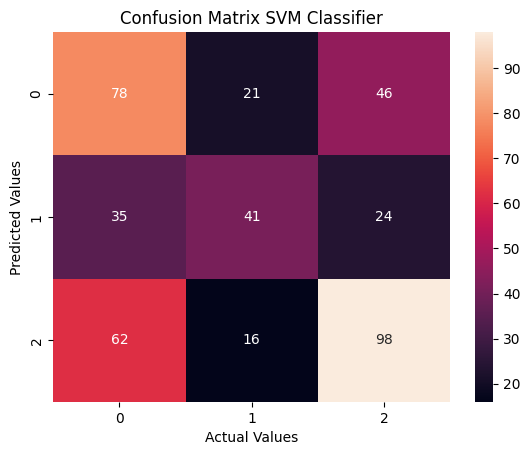

In [ ]:
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix SVM Classifier")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

### Feed forward Network Classifier

In [ ]:
mpl_classifier = MLPClassifier(random_state=1, max_iter=300)
accuracy, precision, recall, cf_matrix = train_and_evaluate_classifier(mpl_classifier, X_train_combined, y_train, X_test_combined, y_test)
print (f"Accuracy of Feed forward Network Classier = {accuracy*100}%")
print(f"\nPrecision of Feed forward Network Classier = {precision*100}%")
print(f"\nRecall of Feed forward Network Classier = {recall*100}%")

Accuracy of Feed forward Network Classier = 54.63182897862233%

Precision of Feed forward Network Classier = 54.63182897862233%

Recall of Feed forward Network Classier = 54.63182897862233%


<Axes: >

Text(0.5, 1.0, 'Confusion Matrix Feed Forward Network Classifier')

Text(0.5, 23.52222222222222, 'Actual Values')

Text(50.722222222222214, 0.5, 'Predicted Values')

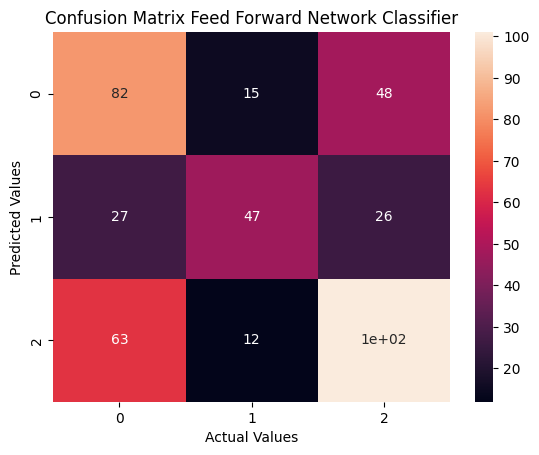

In [ ]:
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix Feed Forward Network Classifier")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

### Logistic Regression

In [ ]:
logistic_classifier = LogisticRegression()
accuracy, precision, recall, cf_matrix = train_and_evaluate_classifier(logistic_classifier, X_train_combined, y_train, X_test_combined, y_test)
print (f"Accuracy of Logistic Regression Classifier = {accuracy*100}%")
print(f"\nPrecision of Logistic Regression Classifier = {precision*100}%")
print(f"\nRecall of Logistic Regression Classifier = {recall*100}%")

Accuracy of Logistic Regression Classifier = 52.73159144893111%

Precision of Logistic Regression Classifier = 52.73159144893111%

Recall of Logistic Regression Classifier = 52.73159144893111%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

Text(0.5, 1.0, 'Confusion Matrix Logistic Regression Classifier')

Text(0.5, 23.52222222222222, 'Actual Values')

Text(50.722222222222214, 0.5, 'Predicted Values')

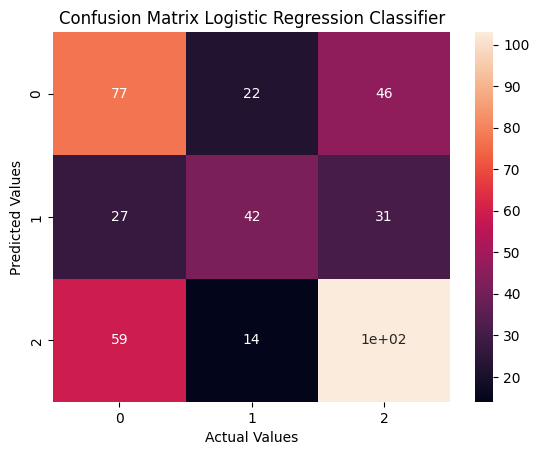

In [ ]:
# Ref : https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix Logistic Regression Classifier")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

### Ablation Study

#### Removing TF-IDF features

In [ ]:
# Concatenate the feature sets except tfid
X_train_combined = sp.hstack([X_train_vec, X_train_vec_bigram, X_train_glove])
X_test_combined = sp.hstack([X_test_vec, X_test_vec_bigram, X_test_glove])

# Train and evaluate the selected classifier after each feature removal.
mpl_classifier = MLPClassifier(random_state=1, max_iter=300)
accuracy, precision, recall, cf_matrix = train_and_evaluate_classifier(mpl_classifier, X_train_combined, y_train, X_test_combined, y_test)
print (f"Accuracy of Logistic Regression Classifier = {accuracy*100}%")
print(f"\nPrecision of Logistic Regression Classifier = {precision*100}%")
print(f"\nRecall of Logistic Regression Classifier = {recall*100}%")


Accuracy of Logistic Regression Classifier = 54.39429928741093%

Precision of Logistic Regression Classifier = 54.39429928741093%

Recall of Logistic Regression Classifier = 54.39429928741093%


<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Removing tfidf')

Text(0.5, 23.52222222222222, 'Actual Values')

Text(50.722222222222214, 0.5, 'Predicted Values')

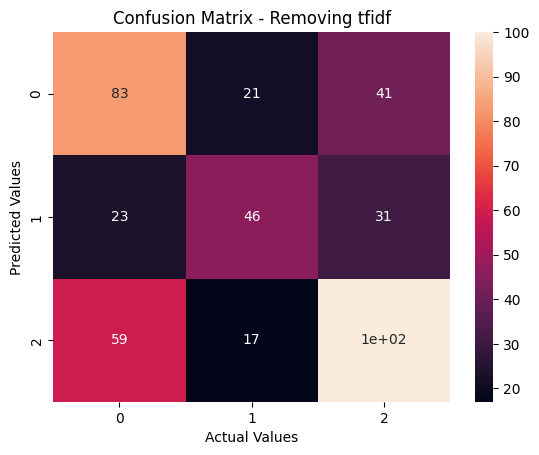

In [ ]:
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix - Removing tfidf")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

#### Removing Bag of words features

In [ ]:
# Concatenate the feature sets except bag of words
X_train_combined = sp.hstack([X_train_vec_tfidf, X_train_vec_bigram, X_train_glove])
X_test_combined = sp.hstack([X_test_vec_tfidf, X_test_vec_bigram, X_test_glove])

# Train and evaluate the selected classifier after each feature removal.
mpl_classifier = MLPClassifier(random_state=1, max_iter=300)
accuracy, precision, recall, cf_matrix = train_and_evaluate_classifier(mpl_classifier, X_train_combined, y_train, X_test_combined, y_test)
print (f"Accuracy of Logistic Regression Classifier = {accuracy*100}%")
print(f"\nPrecision of Logistic Regression Classifier = {precision*100}%")
print(f"\nRecall of Logistic Regression Classifier = {recall*100}%")


Accuracy of Logistic Regression Classifier = 55.34441805225653%

Precision of Logistic Regression Classifier = 55.34441805225653%

Recall of Logistic Regression Classifier = 55.34441805225653%


<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Removing Bag of words')

Text(0.5, 23.52222222222222, 'Actual Values')

Text(50.722222222222214, 0.5, 'Predicted Values')

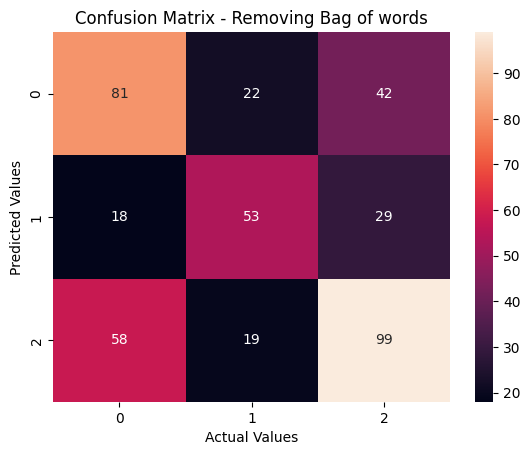

In [ ]:
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix - Removing Bag of words")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

#### Removing N gram features

In [ ]:
# Concatenate the feature sets except bigrams
X_train_combined = sp.hstack([X_train_vec_tfidf, X_train_vec, X_train_glove])
X_test_combined = sp.hstack([X_test_vec_tfidf, X_test_vec, X_test_glove])

# Train and evaluate the selected classifier after each feature removal.
mpl_classifier = MLPClassifier(random_state=1, max_iter=300)
accuracy, precision, recall, cf_matrix = train_and_evaluate_classifier(mpl_classifier, X_train_combined, y_train, X_test_combined, y_test)
print (f"Accuracy of Logistic Regression Classifier = {accuracy*100}%")
print(f"\nPrecision of Logistic Regression Classifier = {precision*100}%")
print(f"\nRecall of Logistic Regression Classifier = {recall*100}%")

Accuracy of Logistic Regression Classifier = 52.25653206650831%

Precision of Logistic Regression Classifier = 52.25653206650831%

Recall of Logistic Regression Classifier = 52.25653206650831%


<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Removing bigrams')

Text(0.5, 23.52222222222222, 'Actual Values')

Text(50.722222222222214, 0.5, 'Predicted Values')

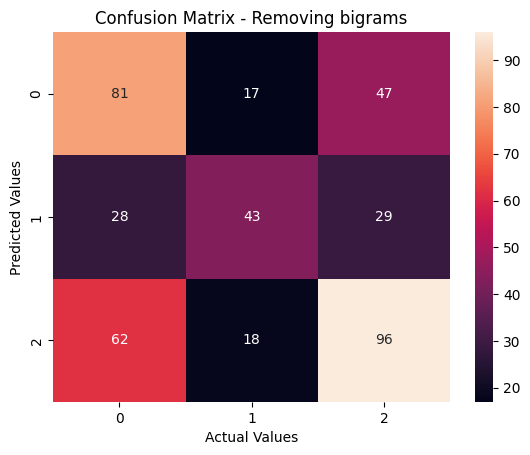

In [ ]:
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix - Removing bigrams")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

#### Removing Glove-based features

In [ ]:
# Concatenate the feature sets except glove features
X_train_combined = sp.hstack([X_train_vec_tfidf, X_train_vec, X_train_vec_bigram])
X_test_combined = sp.hstack([X_test_vec_tfidf, X_test_vec, X_test_vec_bigram])

# Train and evaluate the selected classifier after each feature removal.
mpl_classifier = MLPClassifier(random_state=1, max_iter=300)
accuracy, precision, recall, cf_matrix = train_and_evaluate_classifier(mpl_classifier, X_train_combined, y_train, X_test_combined, y_test)
print (f"Accuracy of Logistic Regression Classifier = {accuracy*100}%")
print(f"\nPrecision of Logistic Regression Classifier = {precision*100}%")
print(f"\nRecall of Logistic Regression Classifier = {recall*100}%")

Accuracy of Logistic Regression Classifier = 53.44418052256532%

Precision of Logistic Regression Classifier = 53.44418052256532%

Recall of Logistic Regression Classifier = 53.44418052256532%


<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Removing Glove features')

Text(0.5, 23.52222222222222, 'Actual Values')

Text(50.722222222222214, 0.5, 'Predicted Values')

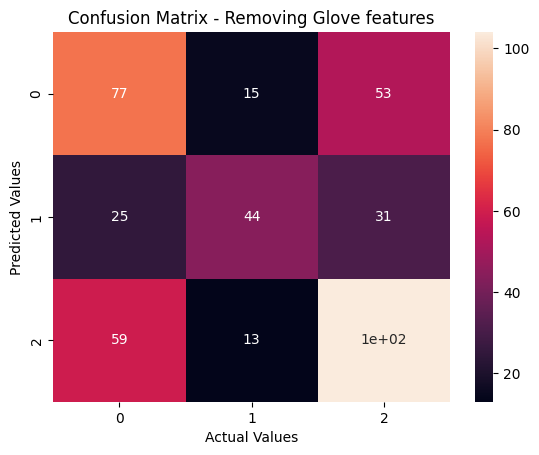

In [ ]:
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix - Removing Glove features")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")